# Analysing Data On Female Chess Players in India

For long, chess has been a male dominated sport. For this project, I am analysing the data from International Chess Federation (FIDE) to look at female representation in the sport. I downloaded the data from [here](https://ratings.fide.com/download.phtml)

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', None)

*The dataset that I downloaded from FIDE has data on 1.1 million players. In another notebook, I filtered out the data for Indian players to avoid slowing this notebook down. First opening this dataset on Indian players and saving it as a dataframe.*

In [3]:
df=pd.read_xml("Indian Players.xml")

In [4]:
df.shape

(108631, 19)

In [5]:
df.dtypes

fideid            int64
name             object
country          object
sex              object
title            object
w_title          object
o_title          object
foa_title        object
rating          float64
games           float64
k               float64
rapid_rating    float64
rapid_games     float64
rapid_k         float64
blitz_rating    float64
blitz_games     float64
blitz_k         float64
birthday        float64
flag             object
dtype: object

*The dataset has data on ~100,000 players from India with details on sex, titles, birthdays and ratings for different formats. First, analysing the distribution by sex*

In [6]:
df.sex.value_counts()

M    91028
F    17603
Name: sex, dtype: int64

*Next, analysing the distribution of titled players by sex. These are the 4 open title in the order of importance--Grandmaster(GM), International Master(IM), Fide Master(FM) and Candidate Master. There are also [corresponding women's titles](https://www.ichess.net/blog/history-women-chess-titles/)."*

In [7]:
df.groupby(by="sex").title.value_counts()

sex  title
F    WFM       44
     WIM       43
     WCM       26
     WGM       13
     IM         8
     GM         2
     CM         1
M    IM       123
     FM        94
     GM        71
     CM        60
Name: title, dtype: int64

*Then, I am creating a new data frame with only data from Grandmasters and Women Grand Masters. FIDE has timeseries data on ratings of the player but the data download does not have it. I want to get it for GM and WGM players using this [API](https://www.ichess.net/blog/history-women-chess-titles/)*

In [8]:
df_gm=df.query("(title=='GM') or (title=='WGM')")

*Now creating a list with only the FIDE ids that are need to request the timeseries data. And then making links out of the IDs to make requests for the data*

In [9]:
fideidlist=df_gm.fideid.to_list()

In [10]:
fidelink=[]

for id in fideidlist:
    fidelink.append("https://fide-ratings-scraper.herokuapp.com//player/" + str(id)+ "/info?include_history=true")

*Next, I will import requests library. And then requesting for data on history of the players using a for loop. Converting these cells to markdown to avoid them running again and again*

import requests

name=[]
for item in fidelink:
    url=link
    response=requests.get(url)
    data=response.json()
    
    for rating in data['history']:
        Rating={}
        Rating['Name']=data['name']
        Rating['date']=rating['date']
        Rating['rating']=rating['rating']
        
    name.append(Rating)
            

*Saving the new list of dictionaries into a dataframe and then a CSV*

df_history=pd.DataFrame(name)

df_history.to_csv("Time Series.csv", index=False)

*Now, opening the new CSV file*

In [11]:
df_timeseries=pd.read_csv("Time Series.csv")

<AxesSubplot:>

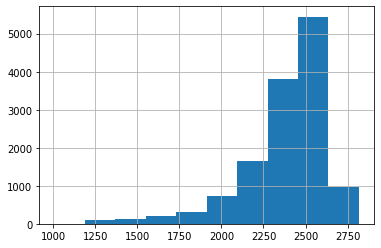

In [17]:
df_timeseries.standard.hist()

*I finished my analysis on python here. On google sheets, I created a transposed version of the Time Series data and created another sheet with only peak ratings, the month the rating was achieved and how long it took. I used these sheets to make the final charts*